## Graph Neural Network Property Predictor


## Imports

In [1]:
# Main Imports
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

# Profiling
import cProfile
import pstats
from pstats import SortKey

# Import Local Files
from model import GNN
from utils.config import FEATURE_NAMES, RESIDUAL_G_FEATURES, MODEL_CONFIG
import utils.data_utils as DataUtils
import utils.visualization as Visualization

c:\Users\Will\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Execution

In [2]:
# Profile the main training routine
# profiler = cProfile.Profile()
# profiler.enable()

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Select target feature for analysis
target_feature = "GMinus_AvgDegree"

# Make sure the user only selects a feature in P(G/G')
if target_feature not in RESIDUAL_G_FEATURES:
    raise ValueError(
        f"Invalid target feature: {target_feature}\n"
        f"Target feature must be one of the following G/G' metrics:\n"
        f"{', '.join(RESIDUAL_G_FEATURES)}"
    )

target_idx = RESIDUAL_G_FEATURES.index(target_feature)

# Generate different graphs for training and test to test generalization
print("Generating graphs...")
G_train, selected_nodes_train = DataUtils.generate_graph(num_nodes=120, edge_prob=0.2)
G_test, selected_nodes_test = DataUtils.generate_graph(num_nodes=120, edge_prob=0.2)

print(f"Train graph: {len(G_train)} nodes, {G_train.number_of_edges()} edges")
print(f"Test graph: {len(G_test)} nodes, {G_test.number_of_edges()} edges")

print("\nProcessing graph data...")
train_data = DataUtils.process_graph_data(G_train, selected_nodes_train, target_idx)
test_data = DataUtils.process_graph_data(G_test, selected_nodes_test, target_idx)

# Initialize Model
print("\nInitializing model...")
node_feature_dim = train_data.x.shape[1]
print(f"Node feature dimension: {node_feature_dim}")
print(f"FEATURE_NAMES length: {len(FEATURE_NAMES)}")

# Make sure the dimensions match
if node_feature_dim != len(FEATURE_NAMES):
    print(f"Warning: Feature dimension mismatch! Expected {len(FEATURE_NAMES)}, got {node_feature_dim}")

model = GNN(node_feature_dim=len(FEATURE_NAMES))
# print(f"Model parameters: {sum(p.numel() for p in model.parameters())}")

# # Print model configuration
# print("\nModel configuration:")
# for k, v in MODEL_CONFIG.items():
#     print(f"  {k}: {v}")

# Train model
print("\nTraining model...")
losses, trained_model, feature_stats = model.train_model(
    model, 
    train_data=train_data,
    test_data=test_data, 
    target_idx=target_idx
)

# Calculate elapsed time and profiling results
# profiler.disable()
# print("\nProfiling Results:")
# stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
# stats.print_stats(20)  # Show top 20 time-consuming functions



Generating graphs...
Train graph: 120 nodes, 1435 edges
Test graph: 120 nodes, 1442 edges

Processing graph data...

Initializing model...
Node feature dimension: 11
FEATURE_NAMES length: 11

Training model...

Feature Statistics (Initial):
Target Feature: GMinus_AvgDegree

Train Graph:
Min degree in G/G': 14
Num nodes in G/G': 116

Test Graph:
Min degree in G/G': 14
Num nodes in G/G': 116

Training Progress:


c:\Users\Will\miniforge3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch   0: Train Loss = 22.2376, Test Loss = 22.0902, Time = 0.14s
Epoch   1: Train Loss = 22.6837, Test Loss = 21.6445, Time = 0.14s
Epoch   2: Train Loss = 21.5275, Test Loss = 21.1346, Time = 0.18s
Epoch   3: Train Loss = 21.8169, Test Loss = 21.0951, Time = 0.15s
Epoch   4: Train Loss = 20.7848, Test Loss = 20.2450, Time = 0.14s
Epoch   5: Train Loss = 21.0678, Test Loss = 20.4095, Time = 0.14s
Epoch   6: Train Loss = 20.4822, Test Loss = 19.9018, Time = 0.16s
Epoch   7: Train Loss = 19.9897, Test Loss = 19.4254, Time = 0.17s
Epoch   8: Train Loss = 20.0417, Test Loss = 18.9594, Time = 0.13s
Epoch   9: Train Loss = 19.2219, Test Loss = 18.7213, Time = 0.13s
Epoch  10: Train Loss = 19.6691, Test Loss = 18.1901, Time = 0.11s
Epoch  11: Train Loss = 19.2252, Test Loss = 18.3516, Time = 0.13s
Epoch  12: Train Loss = 18.9341, Test Loss = 17.5088, Time = 0.11s
Epoch  13: Train Loss = 18.4002, Test Loss = 18.0254, Time = 0.13s
Epoch  14: Train Loss = 18.3443, Test Loss = 17.3546, Time = 0

## Visualization

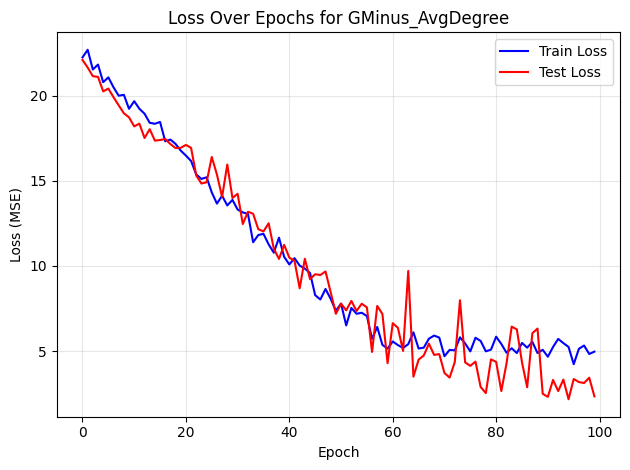


Model Predictions Analysis:
Using 100 sampled target values from training
Average prediction: 13.748112
Average actual value: 21.487038
Std dev of actual values: 0.234747
Average absolute error: 7.738925
Standard deviation of predictions: 8.924757


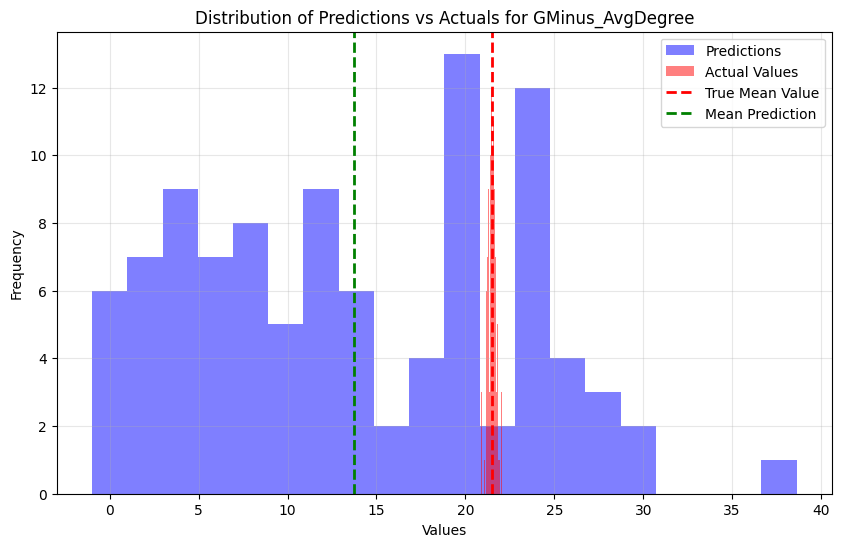

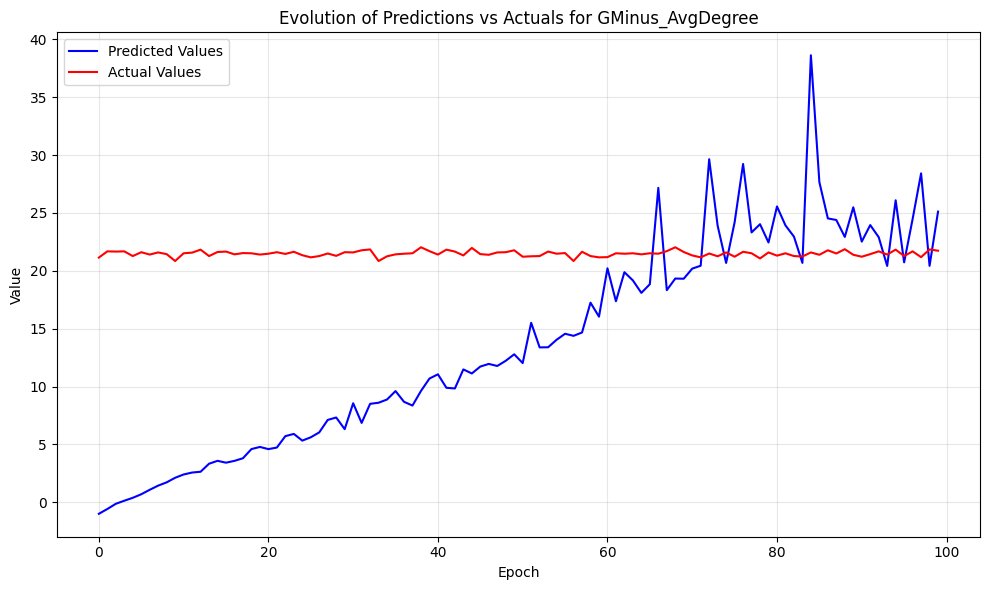


=== Node Feature Statistics ===
                 Feature     Mean      Min      Max  Std Dev  Variance  All Identical
      Node_Metric_Degree 0.703431 0.441176 1.000000 0.116699  0.013619          False
  Node_Metric_Clustering 0.197284 0.122807 0.263158 0.025600  0.000655          False
 Node_Metric_NeighborDeg 0.722273 0.672634 0.772331 0.020404  0.000416          False
 Node_Metric_Betweenness 0.069553 0.000405 0.219286 0.042763  0.001829          False
   Node_Metric_Closeness 4.940093 3.205882 6.000000 0.694510  0.482344          False
    Node_Metric_PageRank 0.083333 0.056736 0.116568 0.011627  0.000135          False
  Node_Metric_CoreNumber 0.997549 0.882353 1.000000 0.015922  0.000254          False
    Node_Metric_LocalEff 0.317492 0.273684 0.358000 0.013693  0.000188          False
 Node_Metric_Eigenvector 0.899058 0.527664 1.318552 0.158205  0.025029          False
Node_Metric_LocalDensity 0.262072 0.201681 0.326316 0.023537  0.000554          False
  Node_Metric_IsSelec

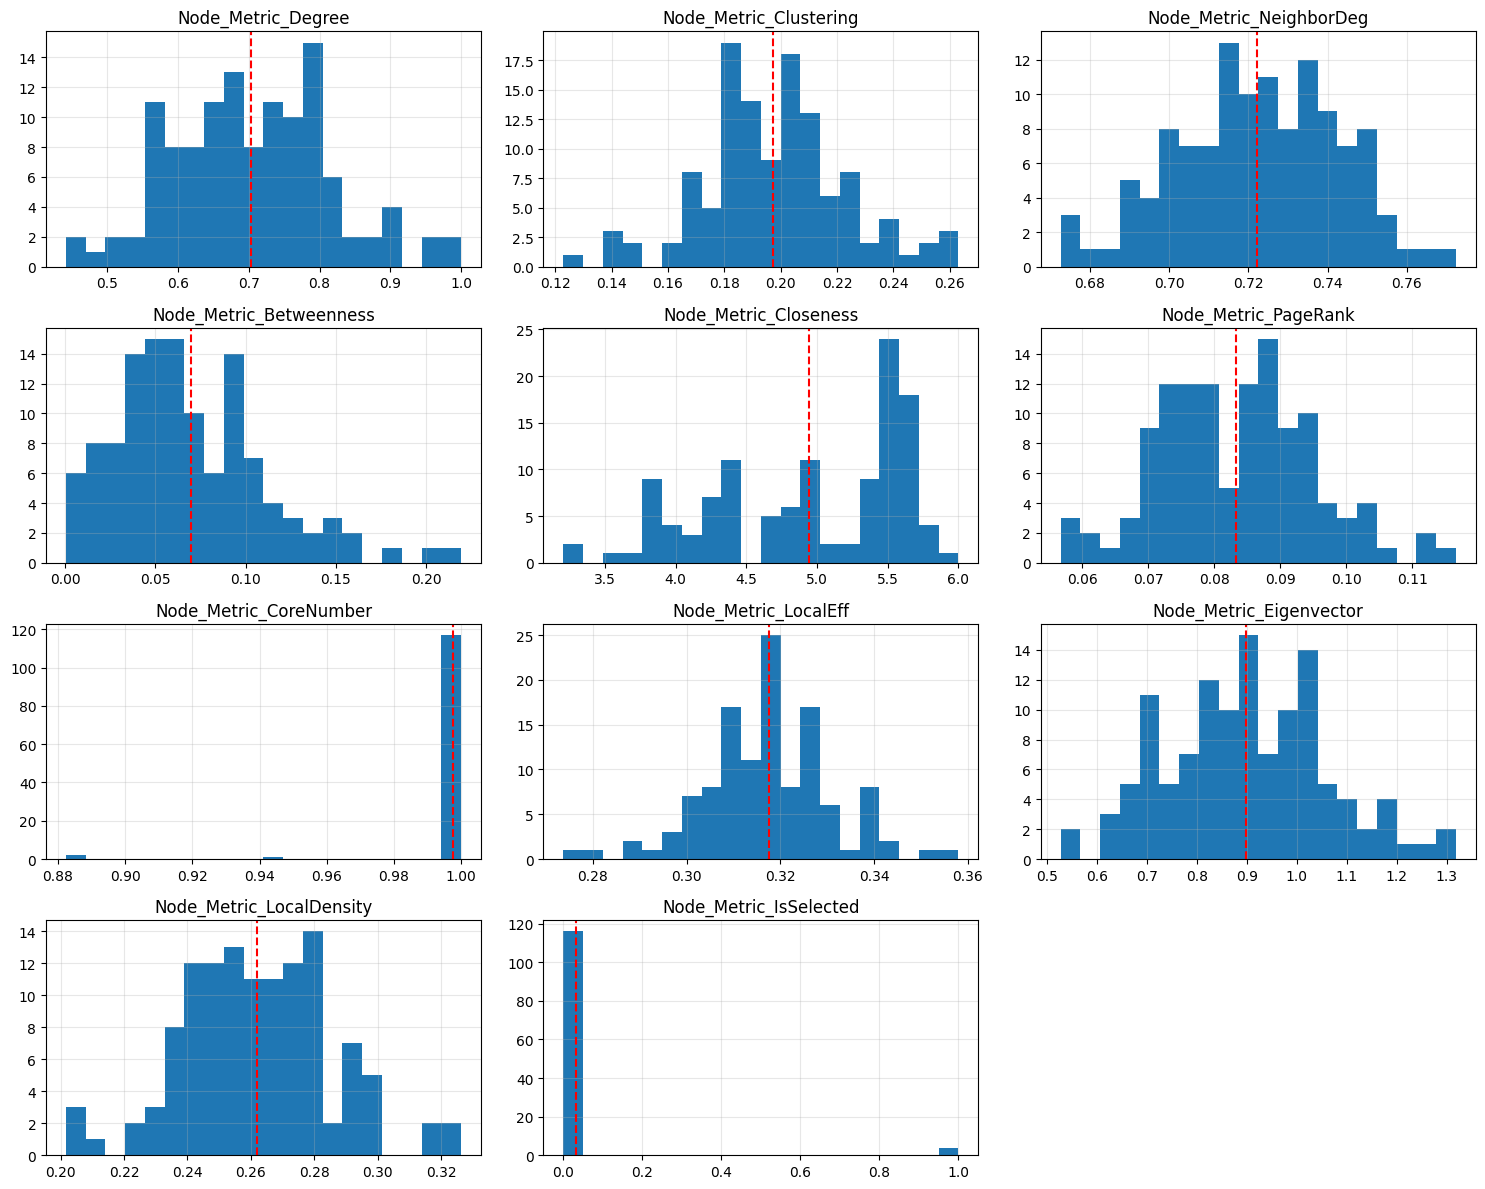


Visualizing Feature Pairs...
Using raw node features (higher variance expected)

=== Spearman Correlation Rankings ===
Feature Pair                                       Correlation Abs Correlation
---------------------------------------------------------------------------
Node_Metric_Degree — Node_Metric_Eigenvector            0.9860          0.9860
Node_Metric_Degree — Node_Metric_PageRank               0.9811          0.9811
Node_Metric_PageRank — Node_Metric_Eigenvector            0.9389          0.9389
Node_Metric_LocalEff — Node_Metric_LocalDensity           0.8564          0.8564
Node_Metric_Clustering — Node_Metric_LocalEff               0.8534          0.8534
Node_Metric_Clustering — Node_Metric_LocalDensity           0.7064          0.7064
Node_Metric_Closeness — Node_Metric_Eigenvector            0.6362          0.6362
Node_Metric_Degree — Node_Metric_Closeness              0.6292          0.6292
Node_Metric_Closeness — Node_Metric_PageRank               0.6020          0.6

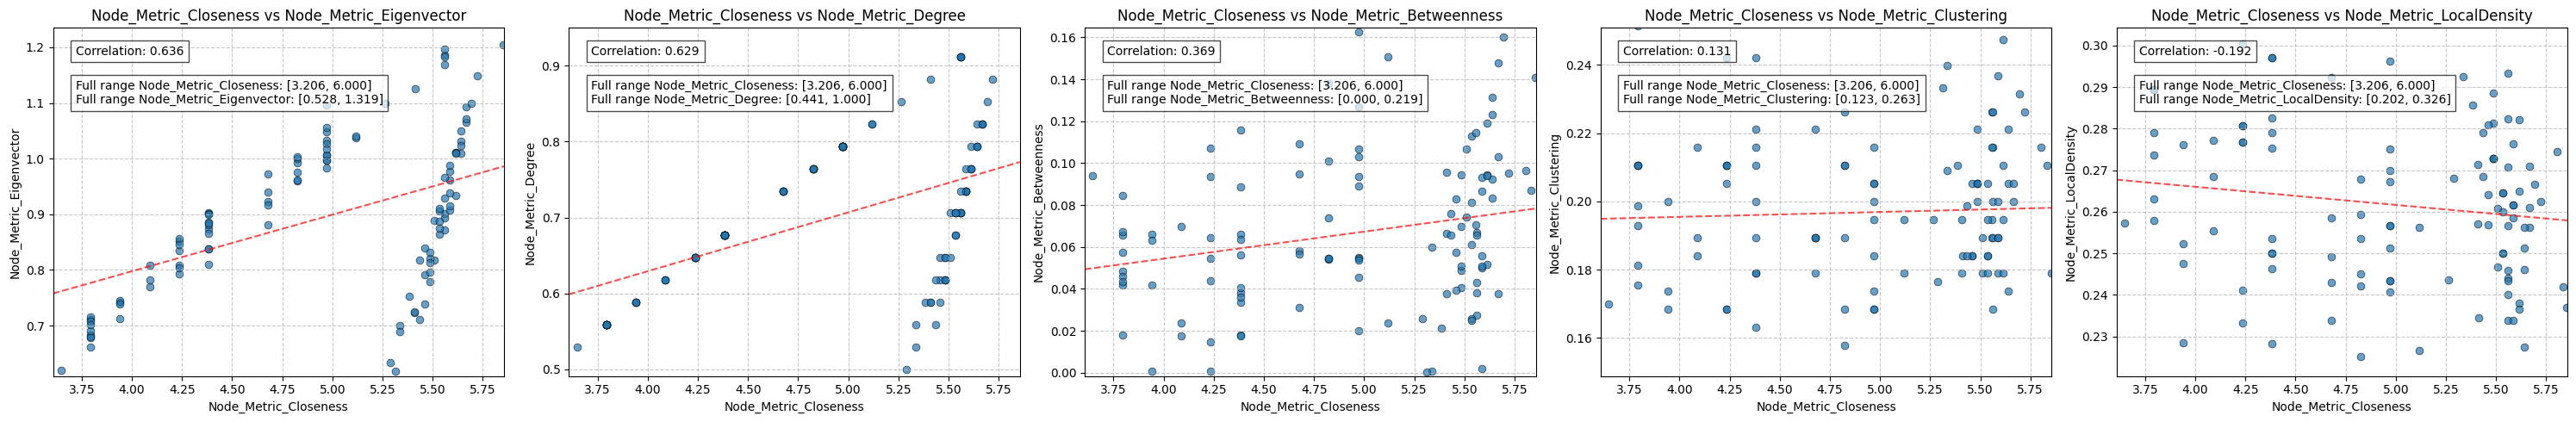

In [3]:
# Do visualization
Visualization.visualize_results(losses, trained_model, test_data, target_feature, feature_stats)
# Visualization.visualize_feature_redundancy(feature_stats)
feature_stats_df = Visualization.visualize_feature_statistics(train_data, show_histograms=True)
Visualization.visualize_feature_pairs(train_data, num_pairs=5, prioritize_variance=True, use_node_features=True)  # Plot 5 random feature pairs